<h1 style = "font-size: 30px; text-align: center;">Artificial Intelligence</h1>
<h1 style = "font-size: 30px; text-align: center;">CA 5</h1>
<h2 style = "font-size: 25px; text-align: center;"> Neural Network </h2>
<h2 style = "font-size: 25px; text-align: center; color: #666">Name: Toktam Sameie</h2>
<h2 style = "font-size: 25px; text-align: center; color: #666">Student Id: 810896054</h2>
<h4 style="text-align: center">Spring 1400</h4>

The purpose of this project is to get acquainted with the 'keras' library and build a neural network by using this library.

# Phase 1 : Preproccessing :
In this part , I'm going to load and decompress UTKFace datas and extract necessary information from it like race , gendes , date and age .

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/drive/MyDrive/UTKFace.tar.gz" .

Here I decompressed the data.


In [ ]:
!tar xvzf UTKFace.tar.gz

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

In [ ]:
from tensorflow.keras import *
from tensorflow.keras.utils import *
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import os
import tensorboard
import os
import copy

In this section , I extract needed information (Race) from images .<br/>
Python method "listdir()" returns a list containing the names of the entries in the directory given by path. The list is in arbitrary order. It does not include the special entries '.' and '..' even if they are present in the directory. path is the directory, which needs to be explored.<br/>
Then , I split each img into 4 parts by '.',then separated the first part that had the necessary information by ‌ '_' , and finally obtained the 'race' of each image.



In [ ]:
img_path = list()
Races = list()
path ="/content/UTKFace"
for img in os.listdir(path):
  temp = img.split('.')
  if len(temp[0].split('_')) == 4 :
    img_path.append(os.path.join(path,img))
    age ,gender, race,date = temp[0].split('_')
    Races.append(int(race)) 
  else :
    continue

In [ ]:
from PIL import Image

The 'race' variable includes 5 different classes 'white' , 'black' , 'indian' , 'asian' and others' which represented by integer numbers from 0 to 4.

I created pandas dataframe from 2 'img_path' and 'Races' lists by using dictionary and grouped them by 'Race' column and I plotted the bar chart of the number of each class according to its type.

In [ ]:
data  = pd.DataFrame({'image':img_path , 'Race': Races})
grouped_data = data.groupby('Race')
number_of_img = []
Images = []
for cls in range(len(grouped_data)):
  Class = grouped_data.get_group(cls)
  Class.reset_index()
  img = Image.open(Class.iloc[cls]['image'])
  Images.append(img)
  number_of_img.append(len(Class))

In [ ]:
print(" The number of data is : ",len(Races) ,' and the number of classes are : ',len(grouped_data))

 The number of data is :  23705  and the number of classes are :  5


<BarContainer object of 5 artists>

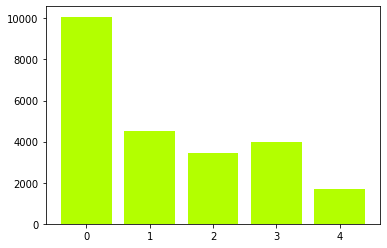

In [ ]:
plt.bar(list(range(5)),number_of_img, color =  ((0.7,1,0,1)))


The races are as follows :<br/>
0 : White<br/>
1 : Black<br/>
2 : Asian<br/>
3 : Indian <br/>
4 : Others


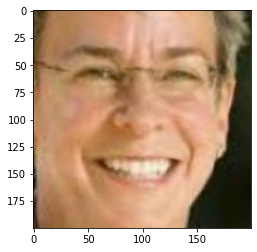

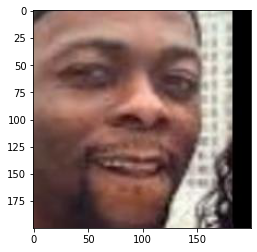

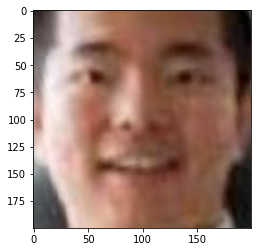

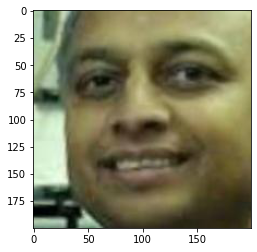

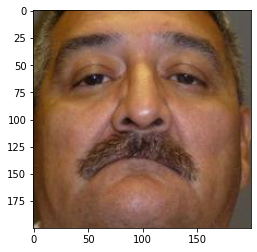

In [ ]:
for img in Images:
  plt.imshow(img)
  plt.show()

As you can see ,the race of persons in the images shown above are White, Black, Asian, Indian, and Others ,respectively . 

#onehot encoding:<br/>
In ML models we are often required to convert the categorical i.e text features to its numeric representation . What onehot encoding does is, it takes a column which has categorical data, which has been label encoded and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

In [ ]:
Racess = [str(to_categorical(i,5)) for i in Races] 

In [ ]:
# one_hot = Onehot(Racess,5)
df_data  = pd.DataFrame({'image':img_path , 'race': Racess})
df_data

,image,race
0,/content/UTKFace/25_1_1_20170117142659506.jpg....,[0. 1. 0. 0. 0.]
1,/content/UTKFace/7_0_3_20170119144311624.jpg.c...,[0. 0. 0. 1. 0.]
2,/content/UTKFace/1_1_3_20161220220119985.jpg.c...,[0. 0. 0. 1. 0.]
3,/content/UTKFace/70_0_0_20170117175207508.jpg....,[1. 0. 0. 0. 0.]
4,/content/UTKFace/35_0_1_20170113155156475.jpg....,[0. 1. 0. 0. 0.]
...,...,...
23700,/content/UTKFace/35_0_1_20170113182403214.jpg....,[0. 1. 0. 0. 0.]
23701,/content/UTKFace/28_0_1_20170113133624449.jpg....,[0. 1. 0. 0. 0.]
23702,/content/UTKFace/58_1_1_20170112213645366.jpg....,[0. 1. 0. 0. 0.]
23703,/content/UTKFace/30_0_1_20170117123820956.jpg....,[0. 1. 0. 0. 0.]


Keras dataset preprocessing utilities, located at tf.keras.preprocessing, help you go from raw data on disk to a tf.data.Dataset object that can be used to train a model.<br/>


Data augmentation is a strategy used to increase the amount of data by using techniques like cropping, padding, flipping, etc.
Data augmentation makes the model more robust to slight variations, and hence prevents the model from overfitting.<br/>
It is neither practical nor efficient to store the augmented data in memory, and that is where the ImageDataGenerator class from Keras comes into play.<br/>

ImageDataGenerator generates batches of tensor image data with real-time data augmentation. ... The output images generated by the generator will have the same output dimensions as the input images.

The ImageDataGenerator class is very useful in image classification . The ImageDataGenerator is an easy way to load and augment images in batches for image classification tasks.It lets you augment your images in real-time while your model is still training! You can apply any random transformations on each training image as it is passed to the model. This will not only make your model robust but will also save up on the overhead memory! Now let’s dive deeper and check out the different ways in which this class is so great for image augmentation.



In [ ]:
dataGenerator = preprocessing.image.ImageDataGenerator(rescale=1/255.0,validation_split=0.3)

In [ ]:
Train_data = dataGenerator.flow_from_dataframe(
    dataframe = df_data, x_col= 'image' ,y_col= 'race' , target_size=(100,100),color_mode= 'grayscale',batch_size = 32 , subset ='training' )

Found 16594 validated image filenames belonging to 5 classes.


In [ ]:
Test_data = dataGenerator.flow_from_dataframe(
    dataframe = df_data, x_col= 'image' ,y_col= 'race' , target_size=(100,100),color_mode= 'grayscale',batch_size = 32 , subset ='validation' )

Found 7111 validated image filenames belonging to 5 classes.


As you can see , dataset is splitted into two training and test parts which their size is 16597 and 7111 respectively and  their sum is equal to 23708 which is equal to total number of samples . 

# Phase 2 : Neural Network Design :
In this phase , I'm going to design a with a given information in discription : 

Input() is used to instantiate a Keras tensor.

In [ ]:
input = layers.Input(shape=(100,100,1))

Here , Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer .<br/>
In this model , I used two hidden layers ( 2 layers between input and output) with 100 nodes and I used 'relu' finction as activation function . The output layer takes different activation functions and for the case of multiclass classification, it is softmax.
 <br/>
I designed the model in such a way that the output of the previous layer is the input of the next layer .

In [ ]:
output = layers.Flatten()(input)
output1 = layers.Dense(1024,activation='relu')(output)
output2 = layers.Dense(512,activation='relu')(output1)
output3 = layers.Dense(5,activation='softmax')(output2)

In [ ]:
model = models.Model(inputs = input , outputs = output3)

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In compile function in keras , we specify the loss function and the optimizer.Here loss is cross entropy loss . Categorical_crossentropy specifies that we have multiple classes. The optimizer is SGD(Gradient descent). Metrics is used to specify the way we want to judge the performance of our neural network. Here we have specified it to accuracy and precision and recal and f1_score which I implement thier functions.


In [ ]:
model.compile(optimizer = optimizers.SGD(learning_rate=0.01),loss="categorical_crossentropy",metrics = ["accuracy",f1_m,precision_m, recall_m])

In [ ]:
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              10241024  
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________


Here we need to specify the input data and labels(which we did in dataGenerator , number of epochs(iterations), and batch size. It returns the history of model training. History consists of model accuracy and losses after each epoch. We will visualize it later.
Usually, the dataset is very big and we cannot fit complete data at once so we use batch size. This divides our data into batches each of size equal to batch_size. Now only this number of samples will be loaded into memory and processed. Once we are done with one batch it is flushed from memory and the next batch will be processed.


In [ ]:
history = model.fit(Train_data,validation_data=Test_data,epochs=10,batch_size=32)

Epoch 1/10
519/519 [==============================] - 59s 112ms/step - loss: 1.2714 - accuracy: 0.5078 - f1_m: 0.3614 - precision_m: 0.6390 - recall_m: 0.2727 - val_loss: 1.1409 - val_accuracy: 0.5414 - val_f1_m: 0.4881 - val_precision_m: 0.6252 - val_recall_m: 0.4034
Epoch 2/10
519/519 [==============================] - 55s 106ms/step - loss: 1.1057 - accuracy: 0.5882 - f1_m: 0.5176 - precision_m: 0.7108 - recall_m: 0.4170 - val_loss: 1.0249 - val_accuracy: 0.6273 - val_f1_m: 0.5358 - val_precision_m: 0.7726 - val_recall_m: 0.4143
Epoch 3/10
519/519 [==============================] - 59s 114ms/step - loss: 1.0217 - accuracy: 0.6218 - f1_m: 0.5781 - precision_m: 0.7294 - recall_m: 0.4847 - val_loss: 0.9769 - val_accuracy: 0.6472 - val_f1_m: 0.6133 - val_precision_m: 0.7448 - val_recall_m: 0.5243
Epoch 4/10
519/519 [==============================] - 54s 103ms/step - loss: 0.9736 - accuracy: 0.6465 - f1_m: 0.6047 - precision_m: 0.7370 - recall_m: 0.5179 - val_loss: 0.9276 - val_accuracy:

In the top as you can see , val_loss is the value of cost function for your cross-validation data and loss is the value of cost function for your training data. On validation data, neurons using drop out do not drop random neurons. The reason is that during training we use drop out in order to add some noise for avoiding over-fitting.

In [ ]:
history_dict = history.history

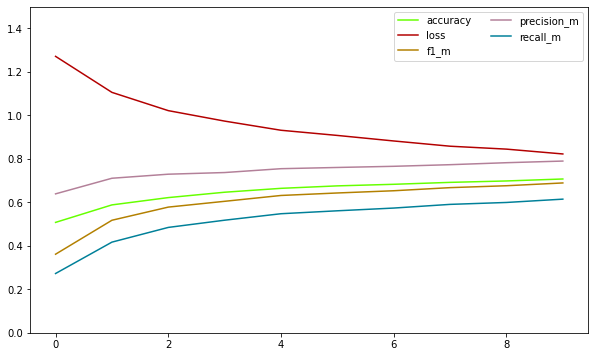

In [ ]:
fig , ax = plt.subplots(figsize=(10,6))
ax.plot(list(range(10)),history_dict['accuracy'], color = ((0.4,1,0,1)), label = 'accuracy')
ax.plot(list(range(10)),history_dict['loss'], color = ((0.7,0,0,1)), label = 'loss')
ax.plot(list(range(10)),history_dict['f1_m'], color = ((0.7,0.5,0,1)), label = 'f1_m')
ax.plot(list(range(10)),history_dict['precision_m'], color = ((0.7,0.5,0.6,1)), label = 'precision_m')
ax.plot(list(range(10)),history_dict['recall_m'], color = ((0,0.5,0.6,1)), label = 'recall_m')
ax.set_ylim([0, 1.5])
ax.legend(loc ="best",ncol = 2);

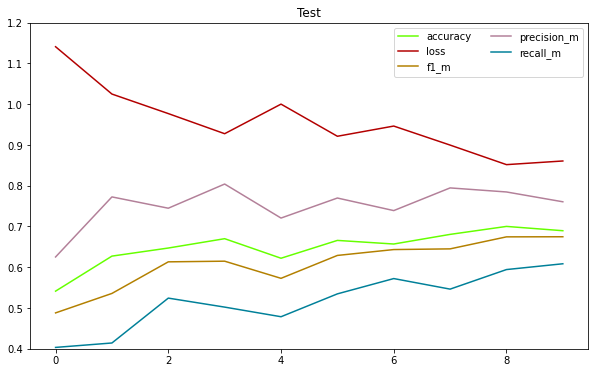

In [ ]:
fig , ax = plt.subplots(figsize=(10,6))
ax.set_title('Test')
ax.plot(list(range(10)),history_dict['val_accuracy'], color = ((0.4,1,0,1)), label = 'accuracy')
ax.plot(list(range(10)),history_dict['val_loss'], color = ((0.7,0,0,1)), label = 'loss')
ax.plot(list(range(10)),history_dict['val_f1_m'], color = ((0.7,0.5,0,1)), label = 'f1_m')
ax.plot(list(range(10)),history_dict['val_precision_m'], color = ((0.7,0.5,0.6,1)), label = 'precision_m')
ax.plot(list(range(10)),history_dict['val_recall_m'], color = ((0,0.5,0.6,1)), label = 'recall_m')
ax.set_ylim([0.4, 1.2])
ax.legend(loc ="best",ncol = 2);

And after 10 epochs the neural network will be trained. The training accuracy is reached 69.15 % so our model is trained.
Now we can check the model’s performance on both test and train data:


In [ ]:
Train_loss, Train_accuracy, Train_f1_score, Train_precision, Train_recall = model.evaluate(Train_data, verbose=0)

In [ ]:
Test_loss, Test_accuracy, Test_f1_score, Test_precision, Test_recall = model.evaluate(Test_data, verbose=0)

I use 'display_table' function to display results in table form :

In [ ]:
from IPython.display import HTML, display

def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

In [ ]:
train_result_table = [['    ','    ','Train','    ','    '],['loss' ,'accuracy','Recall','Precision',"F1"],[Train_loss,Train_accuracy,Train_recall,Train_precision,Train_f1_score]]
display_table(train_result_table)

In [ ]:
test_result_table = [['    ','    ','Test','    ','    '],['loss' ,'accuracy','Recall','Precision',"F1"],[Test_loss,Test_accuracy,Test_recall,Test_precision,Test_f1_score]]
display_table(test_result_table)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Phase 3 :  Data classification
In this section ,  we practice the neural network created on test data.

#part 1 : optimizer 

1 . Momentum or SGD with momentum is a float hyperparameter >= 0 which helps accelerate gradients vectors in the right directions, thus leading to faster converging . It is one of the most popular optimization algorithms Defaults to 0, i.e., vanilla gradient descent.In fact momentum takes past gradients into account to smooth out the steps of gradient descent. It can be applied with batch gradient descent, mini-batch gradient descent or stochastic gradient descent.



Gradient descent (with momentum) optimizer.<br/>

Update rule for parameter w with gradient g when momentum is 0:<br/>

w = w - learning_rate * g <br/>
Update rule when momentum is larger than 0:<br/>

velocity = momentum * velocity - learning_rate * g<br/>
w = w + velocity

In [ ]:
model_1 = models.Model(inputs = input , outputs = output3)
model_1 .compile(optimizer = optimizers.SGD(learning_rate=0.01 , momentum=0.5 ),loss="categorical_crossentropy",metrics = ["accuracy"])
history = model_1.fit(Train_data,validation_data=Test_data,epochs=10,batch_size=32)

Epoch 1/10
519/519 [==============================] - 52s 99ms/step - loss: 0.9184 - accuracy: 0.6751 - val_loss: 0.9242 - val_accuracy: 0.6590
Epoch 2/10
519/519 [==============================] - 52s 100ms/step - loss: 0.8746 - accuracy: 0.6864 - val_loss: 0.8971 - val_accuracy: 0.6705
Epoch 3/10
519/519 [==============================] - 52s 100ms/step - loss: 0.8567 - accuracy: 0.6953 - val_loss: 0.8554 - val_accuracy: 0.6934
Epoch 4/10
519/519 [==============================] - 51s 98ms/step - loss: 0.8412 - accuracy: 0.7020 - val_loss: 0.8620 - val_accuracy: 0.6940
Epoch 5/10
519/519 [==============================] - 52s 101ms/step - loss: 0.8311 - accuracy: 0.7049 - val_loss: 0.9172 - val_accuracy: 0.6645
Epoch 6/10
519/519 [==============================] - 51s 99ms/step - loss: 0.8123 - accuracy: 0.7146 - val_loss: 0.8610 - val_accuracy: 0.6854
Epoch 7/10
519/519 [==============================] - 52s 100ms/step - loss: 0.8035 - accuracy: 0.7151 - val_loss: 0.8481 - val_accur

In [ ]:
model_2 = models.Model(inputs = input , outputs = output3)
opt = optimizers.SGD(learning_rate=0.01, momentum=0.9 )
model_2.compile(optimizer=opt, loss='categorical_crossentropy',metrics = ["accuracy"])
model_2.fit(Train_data,validation_data=Test_data, epochs=10, batch_size=32)

Epoch 1/10
519/519 [==============================] - 39s 74ms/step - loss: 1.1749 - accuracy: 0.5546 - val_loss: 1.2018 - val_accuracy: 0.5348
Epoch 2/10
519/519 [==============================] - 38s 73ms/step - loss: 1.2524 - accuracy: 0.5238 - val_loss: 1.3133 - val_accuracy: 0.5169
Epoch 3/10
519/519 [==============================] - 38s 73ms/step - loss: 1.2008 - accuracy: 0.5283 - val_loss: 1.1059 - val_accuracy: 0.5875
Epoch 4/10
519/519 [==============================] - 38s 73ms/step - loss: 1.2144 - accuracy: 0.5131 - val_loss: 1.3219 - val_accuracy: 0.4781
Epoch 5/10
519/519 [==============================] - 38s 73ms/step - loss: 1.3034 - accuracy: 0.4724 - val_loss: 1.2897 - val_accuracy: 0.4996
Epoch 6/10
519/519 [==============================] - 38s 73ms/step - loss: 1.2874 - accuracy: 0.4896 - val_loss: 1.4273 - val_accuracy: 0.3954
Epoch 7/10
519/519 [==============================] - 38s 73ms/step - loss: 1.2019 - accuracy: 0.5411 - val_loss: 1.4091 - val_accuracy:

As you can see above ,increasing the amount of momentum does not always improve accuracy because too much of it increases the speed of update weights and leads to divergence.

Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.<br/>
below , you can see list of the attractive benefits of using Adam on non-convex optimization problems, as follows:<br/>
Straightforward to implement.<br/>
Computationally efficient.<br/>
Little memory requirements.<br/>
Invariant to diagonal rescale of the gradients.<br/>
Well suited for problems that are large in terms of data and/or parameters.<br/>
Appropriate for non-stationary objectives.<br/>
Appropriate for problems with very noisy/or sparse gradients.<br/>
Hyper-parameters have intuitive interpretation and typically require little tuning.<br/>
Adam is different to classical stochastic gradient descent.
Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.
A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds.<br/>
Adam is combination of the advantages of two other extensions of stochastic gradient descent , 'Adaptive Gradient Algorithm' and 'Root Mean Square Propagation '.<br/>
Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).<br/>

Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.<br/>

The initial value of the moving averages and beta1 and beta2 values close to 1.0 (recommended) result in a bias of moment estimates towards zero. This bias is overcome by first calculating the biased estimates before then calculating bias-corrected estimates.<br/>
Adam is a popular algorithm in the field of deep learning because it achieves good results fast.<br/>







In [ ]:
model_3 = models.Model(inputs = input , outputs = output3)
opt = optimizers.Adam(learning_rate=0.001)
model_3 .compile(optimizer=opt ,loss="categorical_crossentropy",metrics = ["accuracy"])
history = model_3.fit(Train_data,validation_data=Test_data,epochs=10,batch_size=32)

Epoch 1/10
519/519 [==============================] - 60s 114ms/step - loss: 1.0135 - accuracy: 0.6329 - val_loss: 1.0513 - val_accuracy: 0.6058
Epoch 2/10
519/519 [==============================] - 60s 115ms/step - loss: 0.9577 - accuracy: 0.6525 - val_loss: 0.9274 - val_accuracy: 0.6615
Epoch 3/10
519/519 [==============================] - 59s 114ms/step - loss: 0.9149 - accuracy: 0.6748 - val_loss: 1.0883 - val_accuracy: 0.5932
Epoch 4/10
519/519 [==============================] - 60s 116ms/step - loss: 0.9095 - accuracy: 0.6749 - val_loss: 0.9519 - val_accuracy: 0.6642
Epoch 5/10
519/519 [==============================] - 59s 115ms/step - loss: 0.8790 - accuracy: 0.6857 - val_loss: 0.9369 - val_accuracy: 0.6659
Epoch 6/10
519/519 [==============================] - 60s 115ms/step - loss: 0.8814 - accuracy: 0.6881 - val_loss: 0.8976 - val_accuracy: 0.6698
Epoch 7/10
519/519 [==============================] - 59s 114ms/step - loss: 0.8612 - accuracy: 0.6930 - val_loss: 0.9057 - val_ac

In [ ]:
history_dict_3 = history.history

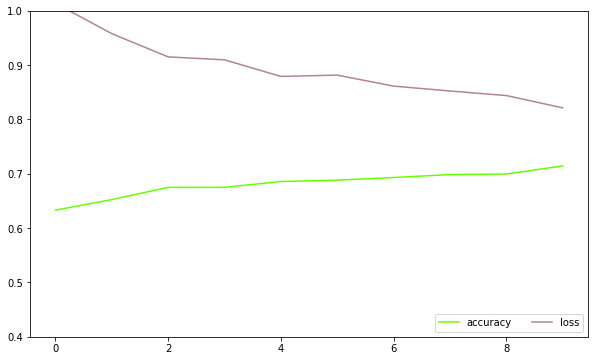

In [ ]:
fig , ax = plt.subplots(figsize=(10,6))
ax.plot(list(range(10)),history_dict_3['accuracy'], color = ((0.4,1,0,1)), label = 'accuracy')
ax.plot(list(range(10)),history_dict_3['loss'], color = ((0.7,0.5,0.6,1)), label = 'loss')
ax.set_ylim([0.4, 1])
ax.legend(loc ="lower right",ncol = 2);

#part 2 : epoch

In terms of artificial neural networks, an epoch refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs. In other words, if we feed a neural network the training data for more than one epoch in different patterns, we hope for a better generalization when given a new "unseen" input (test data).
Heuristically, one motivation is that (especially for large but finite training sets) it gives the network a chance to see the previous data to readjust the model parameters so that the model is not biased towards the last few data points during training.
Be aware that there is no guarantee a network will converge or "get better" by letting it learn the data for multiple epochs. It is an art in machine learning to decide the number of epochs sufficient for a network.
During the training phase, we aim to minimize the error rate as well as to make sure that the model generalizes well on new data. The bias-variance tradeoff is still a potential pitfall we want to avoid, as in other supervised machine learning algorithms.
We face overfitting (high variance) when the model fits perfectly to the training examples but has limited capability generalization. On the other hand, if the model is said to be underfitting (high bias) if it didn’t learn the data well enough. <br/>
regularization is the answer to overfitting which we will discuse about it later.

In [ ]:
model_4 = models.Model(inputs = input , outputs = output3)
opt = optimizers.Adam(learning_rate=0.001)
model_4 .compile(optimizer=opt,loss="categorical_crossentropy",metrics = ["accuracy",f1_m,precision_m, recall_m])
history_4 = model_4.fit(Train_data,validation_data=Test_data,epochs=20,batch_size=32)

Epoch 1/20
519/519 [==============================] - 58s 110ms/step - loss: 0.7654 - accuracy: 0.7268 - f1_m: 0.7146 - precision_m: 0.8015 - recall_m: 0.6472 - val_loss: 0.8242 - val_accuracy: 0.7127 - val_f1_m: 0.6958 - val_precision_m: 0.8099 - val_recall_m: 0.6127
Epoch 2/20
519/519 [==============================] - 57s 110ms/step - loss: 0.7596 - accuracy: 0.7323 - f1_m: 0.7147 - precision_m: 0.7988 - recall_m: 0.6494 - val_loss: 0.8688 - val_accuracy: 0.7014 - val_f1_m: 0.6864 - val_precision_m: 0.7693 - val_recall_m: 0.6218
Epoch 3/20
519/519 [==============================] - 58s 112ms/step - loss: 0.7515 - accuracy: 0.7344 - f1_m: 0.7226 - precision_m: 0.8070 - recall_m: 0.6570 - val_loss: 0.8636 - val_accuracy: 0.6969 - val_f1_m: 0.6845 - val_precision_m: 0.7745 - val_recall_m: 0.6155
Epoch 4/20
519/519 [==============================] - 58s 111ms/step - loss: 0.7608 - accuracy: 0.7274 - f1_m: 0.7168 - precision_m: 0.8029 - recall_m: 0.6499 - val_loss: 0.8618 - val_accuracy:

In [ ]:
history_dict_4 = history_4.history

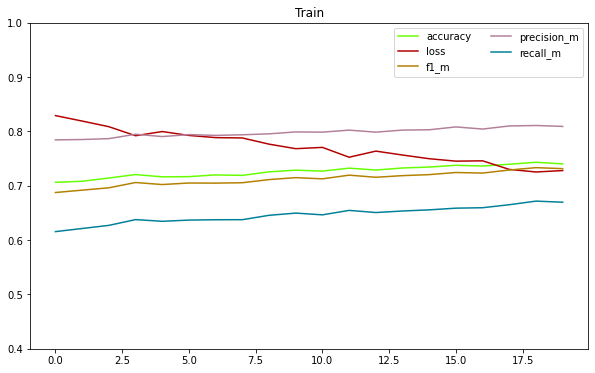

In [ ]:
fig , ax = plt.subplots(figsize=(10,6))
ax.set_title('Train')
ax.plot(list(range(20)),history_dict_4['accuracy'], color = ((0.4,1,0,1)), label = 'accuracy')
ax.plot(list(range(20)),history_dict_4['loss'], color = ((0.7,0,0,1)), label = 'loss')
ax.plot(list(range(20)),history_dict_4['f1_m'], color = ((0.7,0.5,0,1)), label = 'f1_m')
ax.plot(list(range(20)),history_dict_4['precision_m'], color = ((0.7,0.5,0.6,1)), label = 'precision_m')
ax.plot(list(range(20)),history_dict_4['recall_m'], color = ((0,0.5,0.6,1)), label = 'recall_m')
ax.set_ylim([0.4, 1])
ax.legend(loc ="best",ncol = 2);

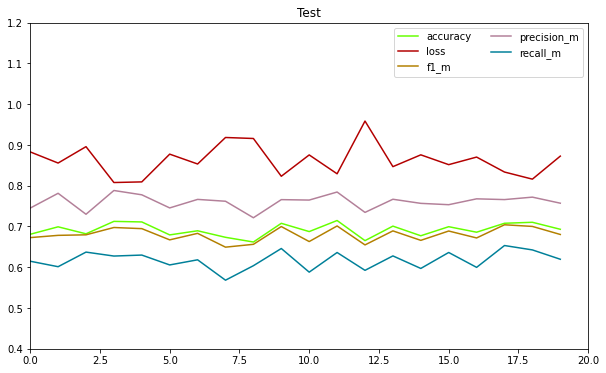

In [ ]:
fig , ax = plt.subplots(figsize=(10,6))
ax.set_title('Test')
ax.plot(list(range(20)),history_dict_4['val_accuracy'], color = ((0.4,1,0,1)), label = 'accuracy')
ax.plot(list(range(20)),history_dict_4['val_loss'], color = ((0.7,0,0,1)), label = 'loss')
ax.plot(list(range(20)),history_dict_4['val_f1_m'], color = ((0.7,0.5,0,1)), label = 'f1_m')
ax.plot(list(range(20)),history_dict_4['val_precision_m'], color = ((0.7,0.5,0.6,1)), label = 'precision_m')
ax.plot(list(range(20)),history_dict_4['val_recall_m'], color = ((0,0.5,0.6,1)), label = 'recall_m')
ax.set_ylim([0.4, 1.2])
ax.set_xlim([0, 20])
ax.legend(loc ="best",ncol = 2);

As you can see , as the epochs increased, so did the accuracy but the accuracy of test decreased overfitting happend from epoch 18 onwards.

#part 3 : loss function 

In [ ]:
model_5 = models.Model(inputs = input , outputs = output3)
opt = optimizers.Adam(learning_rate=0.001)
model_5 .compile(optimizer=opt,loss='mean_squared_error',metrics = ["accuracy"])
history_5 = model_5.fit(Train_data,validation_data=Test_data,epochs=20,batch_size=32)

Epoch 1/20
519/519 [==============================] - 41s 78ms/step - loss: 0.0910 - accuracy: 0.6740 - val_loss: 0.0958 - val_accuracy: 0.6535
Epoch 2/20
519/519 [==============================] - 40s 77ms/step - loss: 0.0906 - accuracy: 0.6749 - val_loss: 0.0986 - val_accuracy: 0.6466
Epoch 3/20
519/519 [==============================] - 40s 77ms/step - loss: 0.0905 - accuracy: 0.6762 - val_loss: 0.0971 - val_accuracy: 0.6432
Epoch 4/20
519/519 [==============================] - 40s 77ms/step - loss: 0.0897 - accuracy: 0.6800 - val_loss: 0.0951 - val_accuracy: 0.6559
Epoch 5/20
519/519 [==============================] - 40s 77ms/step - loss: 0.0897 - accuracy: 0.6775 - val_loss: 0.0972 - val_accuracy: 0.6497
Epoch 6/20
519/519 [==============================] - 41s 78ms/step - loss: 0.0893 - accuracy: 0.6813 - val_loss: 0.0957 - val_accuracy: 0.6555
Epoch 7/20
519/519 [==============================] - 41s 78ms/step - loss: 0.0896 - accuracy: 0.6805 - val_loss: 0.1017 - val_accuracy:

1 . MSE :Computes the mean of squares of errors between labels and predictions.<br/>
Categorical Crossentropy :<br/>
$$Loss = - \sum_{i=1}y_ilog\;\hat y_i $$
Mean Squered Loss:<br/>
$$Loss = - \sum_{i=1}(y_i -\hat y_i)^2 $$
for example , assume Actual label for a given sample in a dataset is “1” and Prediction from the model after applying sigmoid function is "0" . Loss value when using MSE:
(1- 0)² = 1 and Loss value when using log loss:infinity .  <br/>
 As seen above , loss value using MSE is much much less compared to the loss value computed using the log loss function. Hence it is very clear to us that MSE doesn’t strongly penalize misclassifications even for the perfect mismatch! <br/>
 However, if there is a perfect match between predicted values and actual labels both the loss values would be “0” as shown below.
Actual label: “1”
Predicted: “1”
MSE: (1 - 1)² = 0
Log loss: -(1 * log(1) + 0 * log(0)) = 0 . <br/>
Here we have shown that MSE is not a good choice for binary classification problems. But the same can be extended for multi-class classification problems given that target values are one-hot encoded.
<br/>

2 . using MSE means that we assume that the underlying data has been generated from a normal distribution (a bell-shaped curve). In Bayesian terms this means we assume a Gaussian prior . If we use maximum likelihood estimation(MLE), assuming that the data is from a normal distribution(a wrong assumption, by the way), we get the MSE as a Cost function for optimizing our model.<br/>
In classification scenarios, we often use gradient-based techniques(Newton Raphson, gradient descent, etc ..) to find the optimal values for coefficients by minimizing the loss function. Hence if the loss function is not convex, it is not guaranteed that we will always reach the global minima, rather we might get stuck at local minima.

It has been proved that MSE is not a convex function when used in logistic regression , as a result, it is not highly recommended to use this function in Categorical classifications .


#part 4 : regularization 

Weight regularization provides an approach to reduce the overfitting of a deep learning neural network model on the training data and improve the performance of the model on new data, such as the holdout test set.In other words ,
Regularizers allow you to apply penalties on layer parameters or layer activity during optimization. These penalties are summed into the loss function that the network optimizes.Regularization penalties are applied on a per-layer basis.<br/>
These layers expose 3 keyword arguments:<br/>
kernel_regularizer: Regularizer to apply a penalty on the layer's kernel<br/>
bias_regularizer: Regularizer to apply a penalty on the layer's bias<br/>
activity_regularizer: Regularizer to apply a penalty on the layer's output<br/>

In [ ]:
from keras.regularizers import l2
reg_output = layers.Flatten()(input)
reg_output1 = layers.Dense(1024,activation='relu', kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(reg_output)
reg_output2 = layers.Dense(512,activation='relu',kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(reg_output1)
reg_output3 = layers.Dense(5,activation='softmax',kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(reg_output2)

In [ ]:
model_6 = models.Model(inputs = input , outputs = reg_output3)
opt = optimizers.Adam(learning_rate=0.001)
model_6 .compile(optimizer=opt,loss="categorical_crossentropy",metrics = ["accuracy",f1_m,precision_m, recall_m])
history_6 = model_6.fit(Train_data,validation_data=Test_data,epochs=20,batch_size=32)

Epoch 1/20
519/519 [==============================] - 78s 149ms/step - loss: 0.8188 - accuracy: 0.7263 - f1_m: 0.7141 - precision_m: 0.7973 - recall_m: 0.6494 - val_loss: 0.9682 - val_accuracy: 0.6778 - val_f1_m: 0.6733 - val_precision_m: 0.7187 - val_recall_m: 0.6344
Epoch 2/20
519/519 [==============================] - 77s 149ms/step - loss: 0.8130 - accuracy: 0.7294 - f1_m: 0.7121 - precision_m: 0.7967 - recall_m: 0.6465 - val_loss: 0.8711 - val_accuracy: 0.7096 - val_f1_m: 0.6984 - val_precision_m: 0.7715 - val_recall_m: 0.6398
Epoch 3/20
519/519 [==============================] - 77s 149ms/step - loss: 0.8180 - accuracy: 0.7279 - f1_m: 0.7149 - precision_m: 0.7977 - recall_m: 0.6505 - val_loss: 0.9560 - val_accuracy: 0.6806 - val_f1_m: 0.6595 - val_precision_m: 0.7515 - val_recall_m: 0.5902
Epoch 4/20
519/519 [==============================] - 78s 149ms/step - loss: 0.8096 - accuracy: 0.7315 - f1_m: 0.7185 - precision_m: 0.8014 - recall_m: 0.6536 - val_loss: 0.8574 - val_accuracy:

In [ ]:
history_dict_6 = history_6.history

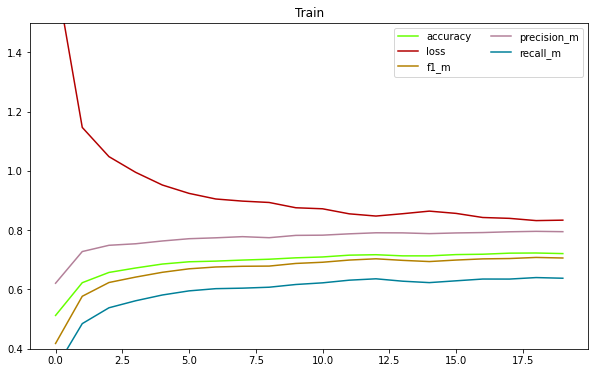

In [ ]:
fig , ax = plt.subplots(figsize=(10,6))
ax.set_title('Train')
ax.plot(list(range(20)),history_dict_6['accuracy'], color = ((0.4,1,0,1)), label = 'accuracy')
ax.plot(list(range(20)),history_dict_6['loss'], color = ((0.7,0,0,1)), label = 'loss')
ax.plot(list(range(20)),history_dict_6['f1_m'], color = ((0.7,0.5,0,1)), label = 'f1_m')
ax.plot(list(range(20)),history_dict_6['precision_m'], color = ((0.7,0.5,0.6,1)), label = 'precision_m')
ax.plot(list(range(20)),history_dict_6['recall_m'], color = ((0,0.5,0.6,1)), label = 'recall_m')
ax.set_ylim([0.4, 1.5])
ax.legend(loc ="best",ncol = 2);

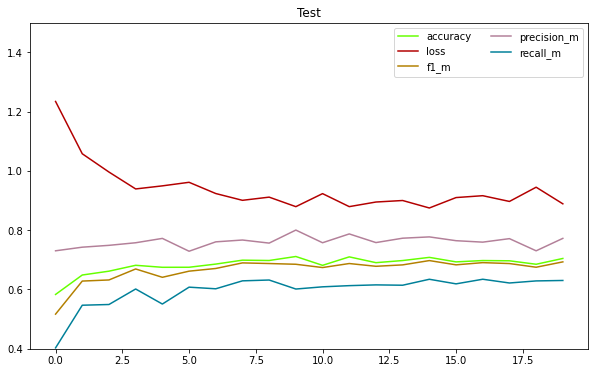

In [ ]:
fig , ax = plt.subplots(figsize=(10,6))
ax.set_title('Test')
ax.plot(list(range(20)),history_dict_6['val_accuracy'], color = ((0.4,1,0,1)), label = 'accuracy')
ax.plot(list(range(20)),history_dict_6['val_loss'], color = ((0.7,0,0,1)), label = 'loss')
ax.plot(list(range(20)),history_dict_6['val_f1_m'], color = ((0.7,0.5,0,1)), label = 'f1_m')
ax.plot(list(range(20)),history_dict_6['val_precision_m'], color = ((0.7,0.5,0.6,1)), label = 'precision_m')
ax.plot(list(range(20)),history_dict_6['val_recall_m'], color = ((0,0.5,0.6,1)), label = 'recall_m')
ax.set_ylim([0.4, 1.5])
ax.legend(loc ="best",ncol = 2);

 With regularization, overfitting did not occur and we achieved good accuracy.

#Drop out :<br/>
 Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.
<br/>
As a neural network learns, neuron weights settle into their context within the network. Weights of neurons are tuned for specific features providing some specialization. Neighboring neurons become to rely on this specialization, which if taken too far can result in a fragile model too specialized to the training data. This reliant on context for a neuron during training is referred to complex co-adaptations.<br/>

You can imagine that if neurons are randomly dropped out of the network during training, that other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.<br/>

The effect is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.<br/>



In [ ]:
drop_output = layers.Flatten()(input)
drop_output = layers.Dropout(0.1)(drop_output)
drop_output1 = layers.Dense(1024,activation='relu')(drop_output)
drop_output1 = layers.Dropout(0.1)(drop_output1)
drop_output2 = layers.Dense(512,activation='relu')(drop_output1)
drop_output2 = layers.Dropout(0.1)(drop_output2)
drop_output3 = layers.Dense(5,activation='softmax')(drop_output2)

In [ ]:
model_7 = models.Model(inputs = input , outputs = drop_output3)
model_7 .compile(optimizer='adam',loss="categorical_crossentropy",metrics = ["accuracy",f1_m,precision_m, recall_m])
history_7 = model_7.fit(Train_data,validation_data=Test_data,epochs=20,batch_size=32)

Epoch 1/20
519/519 [==============================] - 64s 123ms/step - loss: 1.5952 - accuracy: 0.4621 - f1_m: 0.3207 - precision_m: 0.5964 - recall_m: 0.2368 - val_loss: 1.1361 - val_accuracy: 0.5366 - val_f1_m: 0.5139 - val_precision_m: 0.6413 - val_recall_m: 0.4311
Epoch 2/20
519/519 [==============================] - 63s 121ms/step - loss: 1.2627 - accuracy: 0.4981 - f1_m: 0.4075 - precision_m: 0.6808 - recall_m: 0.3056 - val_loss: 1.1775 - val_accuracy: 0.5489 - val_f1_m: 0.4084 - val_precision_m: 0.8353 - val_recall_m: 0.2747
Epoch 3/20
519/519 [==============================] - 63s 122ms/step - loss: 1.1920 - accuracy: 0.5307 - f1_m: 0.4559 - precision_m: 0.7046 - recall_m: 0.3469 - val_loss: 1.1111 - val_accuracy: 0.5677 - val_f1_m: 0.5099 - val_precision_m: 0.7452 - val_recall_m: 0.3912
Epoch 4/20
519/519 [==============================] - 63s 121ms/step - loss: 1.1956 - accuracy: 0.5180 - f1_m: 0.4522 - precision_m: 0.7165 - recall_m: 0.3420 - val_loss: 1.1484 - val_accuracy:

As I said , dropout is a method to prevent overfitting .in our previous model we didn't face overfitting , so dropout just  made our model simpler and reduced accuracy .

our best model is the one with "Adam" optimizer and 20 epochs :

# Phase 4 :

Autoencoders are a specific type of feedforward neural networks where the input is the same as the output. They compress the input into a lower-dimensional code and then reconstruct the output from this representation. The code is a compact “summary” or “compression” of the input, also called the latent-space representation.<br/>
An autoencoder consists of 3 components: encoder, code and decoder. The encoder compresses the input and produces the code, the decoder then reconstructs the input only using this code.<br/>
To build an autoencoder we need 3 things: an encoding method, decoding method, and a loss function to compare the output with the target. We will explore these in the next section.<br/>
Autoencoders are mainly a dimensionality reduction (or compression) algorithm with a couple of important properties:<br/>
Data-specific: Autoencoders are only able to meaningfully compress data similar to what they have been trained on. Since they learn features specific for the given training data, they are different than a standard data compression algorithm like gzip. So we can’t expect an autoencoder trained on handwritten digits to compress landscape photos.<br/>
Lossy: The output of the autoencoder will not be exactly the same as the input, it will be a close but degraded representation. If you want lossless compression they are not the way to go.<br/>
Unsupervised: To train an autoencoder we don’t need to do anything fancy, just throw the raw input data at it. Autoencoders are considered an unsupervised learning technique since they don’t need explicit labels to train on. But to be more precise they are self-supervised because they generate their own labels from the training data.<br/>




In [ ]:
encoder_output = layers.Flatten()(input)
encoder_output1 = layers.Dense(1000,activation='relu')(encoder_output)
encoder_output2 = layers.Dense(500,activation='relu')(encoder_output1)
encoder_output3 = layers.Dense(5,activation='softmax')(encoder_output2)
# encoder_output4 = layers.Dense(5,activation='softmax')(encoder_output3)

In [ ]:
encoder_model = models.Model(inputs = input , outputs = encoder_output3)
opt = optimizers.Adam(learning_rate=0.01)
encoder_model .compile(optimizer=opt,loss="categorical_crossentropy",metrics = ["accuracy"])
encoder_history = encoder_model.fit(Train_data,validation_data=Test_data,epochs=3,batch_size=64)